# Lab 3

Julian Hayes

10 May 2021

## Background

### What is a filter?

In the physical world, a filter is a device that prevents certain things from passing through it. Coffee filters, for example, prevent large chunks of coffee beans from passing through while allowing the coffee to pass down into the awaiting container; image filters alter how light particles interact with pictures to change the color, tone, and other aspects of the image. In data science, filters work similarly: they act on a dataset to allow the user to examine certain data while having the rest filtered out.

Data filters are not physical objects, but rather functions that filter data based on their frequency. One of the most common filter functions is the Butterworth filter, which can be applied as either high- or low-pass (in which data that is above or below a certain cutoff point are allowed to pass through), or band-pass or band-stop (in which only data inside or outside of a given window are allowed to pass through).

Filters are very important to data science because they allow users to view only data that have been deemed significant or hone in on specific parts of datasets. Many datasets are far too large to go through manually and select the specific points of interest, so filters make everyone's lives easier by automating the process.

## Methods

The dataset we will be using for this lab is taken from machinelearningmastery.com and is credited to Andrews & Herzburg (1985). The dataset tracks sunspot activity over the course of 234 years (1749-1983). Sunspots were counted each month of each year, resulting in 2,820 observations– one for each month of each year in the sample.

We will be using two kinds of Butterworth filters on this dataset: a high-pass filter to identify months with higher sunspot counts and a low-pass filter to find the exact opposite; we are only concerned with extreme cases.

## Results

In [73]:
ss <- read.csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv")
head(ss)

,Month,Sunspots
,<chr>,<dbl>
1,1749-01,58.0
2,1749-02,62.6
3,1749-03,70.0
4,1749-04,55.7
5,1749-05,85.0
6,1749-06,83.5


In [60]:
install.packages("tswge")
library(tswge)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘signal’, ‘PolynomF’, ‘waveslim’, ‘astsa’




### Original Data

$autplt
 [1] 1.0000000 0.9216861 0.8904722 0.8745325 0.8635318 0.8495942 0.8362934
 [8] 0.8191336 0.8053822 0.7970819 0.7781911 0.7562969 0.7342391 0.7095905
[15] 0.6862332 0.6633309 0.6320074 0.6020520 0.5688044 0.5418041 0.5115202
[22] 0.4797642 0.4512265 0.4262298 0.3907143 0.3669975

$freq
   [1] 0.0003546099 0.0007092199 0.0010638298 0.0014184397 0.0017730496
   [6] 0.0021276596 0.0024822695 0.0028368794 0.0031914894 0.0035460993
  [11] 0.0039007092 0.0042553191 0.0046099291 0.0049645390 0.0053191489
  [16] 0.0056737589 0.0060283688 0.0063829787 0.0067375887 0.0070921986
  [21] 0.0074468085 0.0078014184 0.0081560284 0.0085106383 0.0088652482
  [26] 0.0092198582 0.0095744681 0.0099290780 0.0102836879 0.0106382979
  [31] 0.0109929078 0.0113475177 0.0117021277 0.0120567376 0.0124113475
  [36] 0.0127659574 0.0131205674 0.0134751773 0.0138297872 0.0141843972
  [41] 0.0145390071 0.0148936170 0.0152482270 0.0156028369 0.0159574468
  [46] 0.0163120567 0.0166666667 0.0170212766 0.0173758865 0.0177304965
  [51] 0.0180851064 0.0184397163 0.0187943262 0.0191489362 0.0195035461
  [56] 0.0198581560 0.0202127660 0.0205673759 0.0209219858 0.0212765957
  [61] 0.0216312057 0.0219858156 0.0223404255 0.0226950355 0.0230496454
  [66] 0.0234042553 0.0237588652 0.0241134752 0.0244680851 0.0248226950
  [71] 0.0251773050 0.0255319149 0.0258865248 0.0262411348 0.0265957447
  [76] 0.0269503546 0.0273049645 0.0276595745 0.0280141844 0.0283687943
  [81] 0.0287234043 0.0290780142 0.0294326241 0.0297872340 0.0301418440
  [86] 0.0304964539 0.0308510638 0.0312056738 0.0315602837 0.0319148936
  [91] 0.0322695035 0.0326241135 0.0329787234 0.0333333333 0.0336879433
  [96] 0.0340425532 0.0343971631 0.0347517730 0.0351063830 0.0354609929
 [101] 0.0358156028 0.0361702128 0.0365248227 0.0368794326 0.0372340426
 [106] 0.0375886525 0.0379432624 0.0382978723 0.0386524823 0.0390070922
 [111] 0.0393617021 0.0397163121 0.0400709220 0.0404255319 0.0407801418
 [116] 0.0411347518 0.0414893617 0.0418439716 0.0421985816 0.0425531915
 [121] 0.0429078014 0.0432624113 0.0436170213 0.0439716312 0.0443262411
 [126] 0.0446808511 0.0450354610 0.0453900709 0.0457446809 0.0460992908
 [131] 0.0464539007 0.0468085106 0.0471631206 0.0475177305 0.0478723404
 [136] 0.0482269504 0.0485815603 0.0489361702 0.0492907801 0.0496453901
 [141] 0.0500000000 0.0503546099 0.0507092199 0.0510638298 0.0514184397
 [146] 0.0517730496 0.0521276596 0.0524822695 0.0528368794 0.0531914894
 [151] 0.0535460993 0.0539007092 0.0542553191 0.0546099291 0.0549645390
 [156] 0.0553191489 0.0556737589 0.0560283688 0.0563829787 0.0567375887
 [161] 0.0570921986 0.0574468085 0.0578014184 0.0581560284 0.0585106383
 [166] 0.0588652482 0.0592198582 0.0595744681 0.0599290780 0.0602836879
 [171] 0.0606382979 0.0609929078 0.0613475177 0.0617021277 0.0620567376
 [176] 0.0624113475 0.0627659574 0.0631205674 0.0634751773 0.0638297872
 [181] 0.0641843972 0.0645390071 0.0648936170 0.0652482270 0.0656028369
 [186] 0.0659574468 0.0663120567 0.0666666667 0.0670212766 0.0673758865
 [191] 0.0677304965 0.0680851064 0.0684397163 0.0687943262 0.0691489362
 [196] 0.0695035461 0.0698581560 0.0702127660 0.0705673759 0.0709219858
 [201] 0.0712765957 0.0716312057 0.0719858156 0.0723404255 0.0726950355
 [206] 0.0730496454 0.0734042553 0.0737588652 0.0741134752 0.0744680851
 [211] 0.0748226950 0.0751773050 0.0755319149 0.0758865248 0.0762411348
 [216] 0.0765957447 0.0769503546 0.0773049645 0.0776595745 0.0780141844
 [221] 0.0783687943 0.0787234043 0.0790780142 0.0794326241 0.0797872340
 [226] 0.0801418440 0.0804964539 0.0808510638 0.0812056738 0.0815602837
 [231] 0.0819148936 0.0822695035 0.0826241135 0.0829787234 0.0833333333
 [236] 0.0836879433 0.0840425532 0.0843971631 0.0847517730 0.0851063830
 [241] 0.0854609929 0.0858156028 0.0861702128 0.0865248227 0.0868794326
 [246] 0.0872340426 0.0875886525 0.0879432624 0.0882978723 0.0886524823
 [251] 0.0890070922 0.0893617021 0.0897163121 0.0900709220 0.0904255319
 [256] 0.0907801418 0.0911347518 

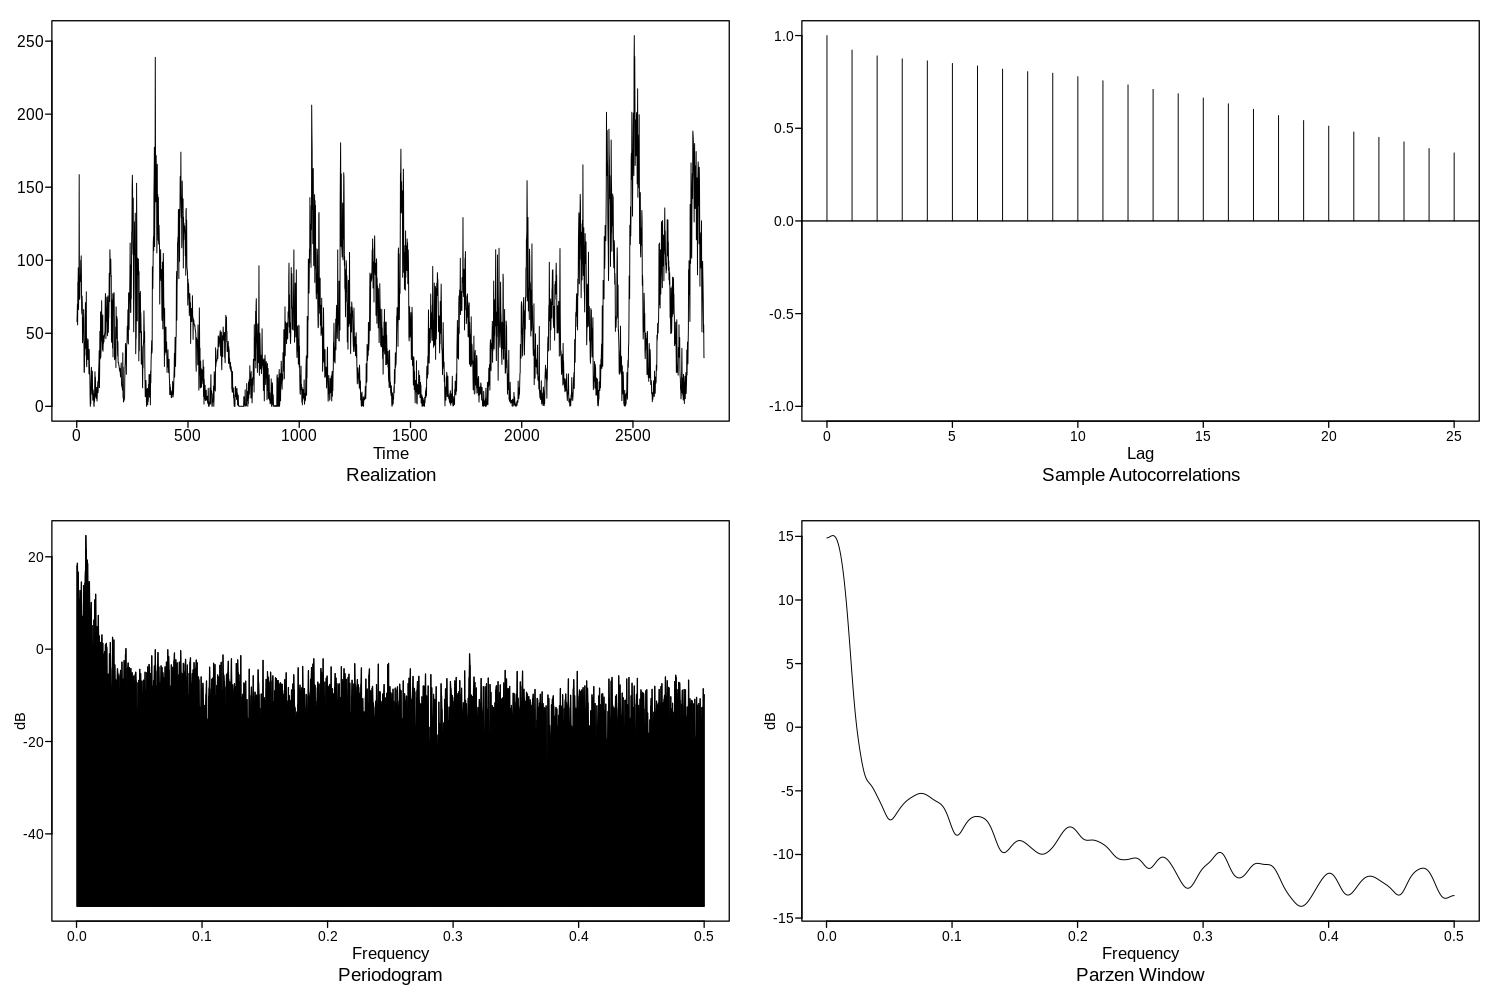

In [72]:
plotts.sample.wge(ss$Sunspots)

### High-Pass Filter

$autplt
 [1]  1.000000000 -0.942108881  0.782543418 -0.555428236  0.307023286
 [6] -0.083543042 -0.080156992  0.167790456 -0.183027819  0.145298656
[11] -0.081940431  0.019512289  0.023037722 -0.037645071  0.026527012
[16]  0.001324331 -0.034827564  0.064893330 -0.086675161  0.099645664
[21] -0.106002907  0.108430353 -0.108285888  0.104929865 -0.096316431
[26]  0.080417346

$freq
   [1] 0.0003546099 0.0007092199 0.0010638298 0.0014184397 0.0017730496
   [6] 0.0021276596 0.0024822695 0.0028368794 0.0031914894 0.0035460993
  [11] 0.0039007092 0.0042553191 0.0046099291 0.0049645390 0.0053191489
  [16] 0.0056737589 0.0060283688 0.0063829787 0.0067375887 0.0070921986
  [21] 0.0074468085 0.0078014184 0.0081560284 0.0085106383 0.0088652482
  [26] 0.0092198582 0.0095744681 0.0099290780 0.0102836879 0.0106382979
  [31] 0.0109929078 0.0113475177 0.0117021277 0.0120567376 0.0124113475
  [36] 0.0127659574 0.0131205674 0.0134751773 0.0138297872 0.0141843972
  [41] 0.0145390071 0.0148936170 0.0152482270 0.0156028369 0.0159574468
  [46] 0.0163120567 0.0166666667 0.0170212766 0.0173758865 0.0177304965
  [51] 0.0180851064 0.0184397163 0.0187943262 0.0191489362 0.0195035461
  [56] 0.0198581560 0.0202127660 0.0205673759 0.0209219858 0.0212765957
  [61] 0.0216312057 0.0219858156 0.0223404255 0.0226950355 0.0230496454
  [66] 0.0234042553 0.0237588652 0.0241134752 0.0244680851 0.0248226950
  [71] 0.0251773050 0.0255319149 0.0258865248 0.0262411348 0.0265957447
  [76] 0.0269503546 0.0273049645 0.0276595745 0.0280141844 0.0283687943
  [81] 0.0287234043 0.0290780142 0.0294326241 0.0297872340 0.0301418440
  [86] 0.0304964539 0.0308510638 0.0312056738 0.0315602837 0.0319148936
  [91] 0.0322695035 0.0326241135 0.0329787234 0.0333333333 0.0336879433
  [96] 0.0340425532 0.0343971631 0.0347517730 0.0351063830 0.0354609929
 [101] 0.0358156028 0.0361702128 0.0365248227 0.0368794326 0.0372340426
 [106] 0.0375886525 0.0379432624 0.0382978723 0.0386524823 0.0390070922
 [111] 0.0393617021 0.0397163121 0.0400709220 0.0404255319 0.0407801418
 [116] 0.0411347518 0.0414893617 0.0418439716 0.0421985816 0.0425531915
 [121] 0.0429078014 0.0432624113 0.0436170213 0.0439716312 0.0443262411
 [126] 0.0446808511 0.0450354610 0.0453900709 0.0457446809 0.0460992908
 [131] 0.0464539007 0.0468085106 0.0471631206 0.0475177305 0.0478723404
 [136] 0.0482269504 0.0485815603 0.0489361702 0.0492907801 0.0496453901
 [141] 0.0500000000 0.0503546099 0.0507092199 0.0510638298 0.0514184397
 [146] 0.0517730496 0.0521276596 0.0524822695 0.0528368794 0.0531914894
 [151] 0.0535460993 0.0539007092 0.0542553191 0.0546099291 0.0549645390
 [156] 0.0553191489 0.0556737589 0.0560283688 0.0563829787 0.0567375887
 [161] 0.0570921986 0.0574468085 0.0578014184 0.0581560284 0.0585106383
 [166] 0.0588652482 0.0592198582 0.0595744681 0.0599290780 0.0602836879
 [171] 0.0606382979 0.0609929078 0.0613475177 0.0617021277 0.0620567376
 [176] 0.0624113475 0.0627659574 0.0631205674 0.0634751773 0.0638297872
 [181] 0.0641843972 0.0645390071 0.0648936170 0.0652482270 0.0656028369
 [186] 0.0659574468 0.0663120567 0.0666666667 0.0670212766 0.0673758865
 [191] 0.0677304965 0.0680851064 0.0684397163 0.0687943262 0.0691489362
 [196] 0.0695035461 0.0698581560 0.0702127660 0.0705673759 0.0709219858
 [201] 0.0712765957 0.0716312057 0.0719858156 0.0723404255 0.0726950355
 [206] 0.0730496454 0.0734042553 0.0737588652 0.0741134752 0.0744680851
 [211] 0.0748226950 0.0751773050 0.0755319149 0.0758865248 0.0762411348
 [216] 0.0765957447 0.0769503546 0.0773049645 0.0776595745 0.0780141844
 [221] 0.0783687943 0.0787234043 0.0790780142 0.0794326241 0.0797872340
 [226] 0.0801418440 0.0804964539 0.0808510638 0.0812056738 0.0815602837
 [231] 0.0819148936 0.0822695035 0.0826241135 0.0829787234 0.0833333333
 [236] 0.0836879433 0.0840425532 0.0843971631 0.0847517730 0.0851063830
 [241] 0.0854609929 0.0858156028 0.0861702128 0.0865248227 0.0868794326
 [246] 0.0872340426 0.0875886525 0.0879432624 0.0882978723 0.0886524823
 [251] 0.08900709

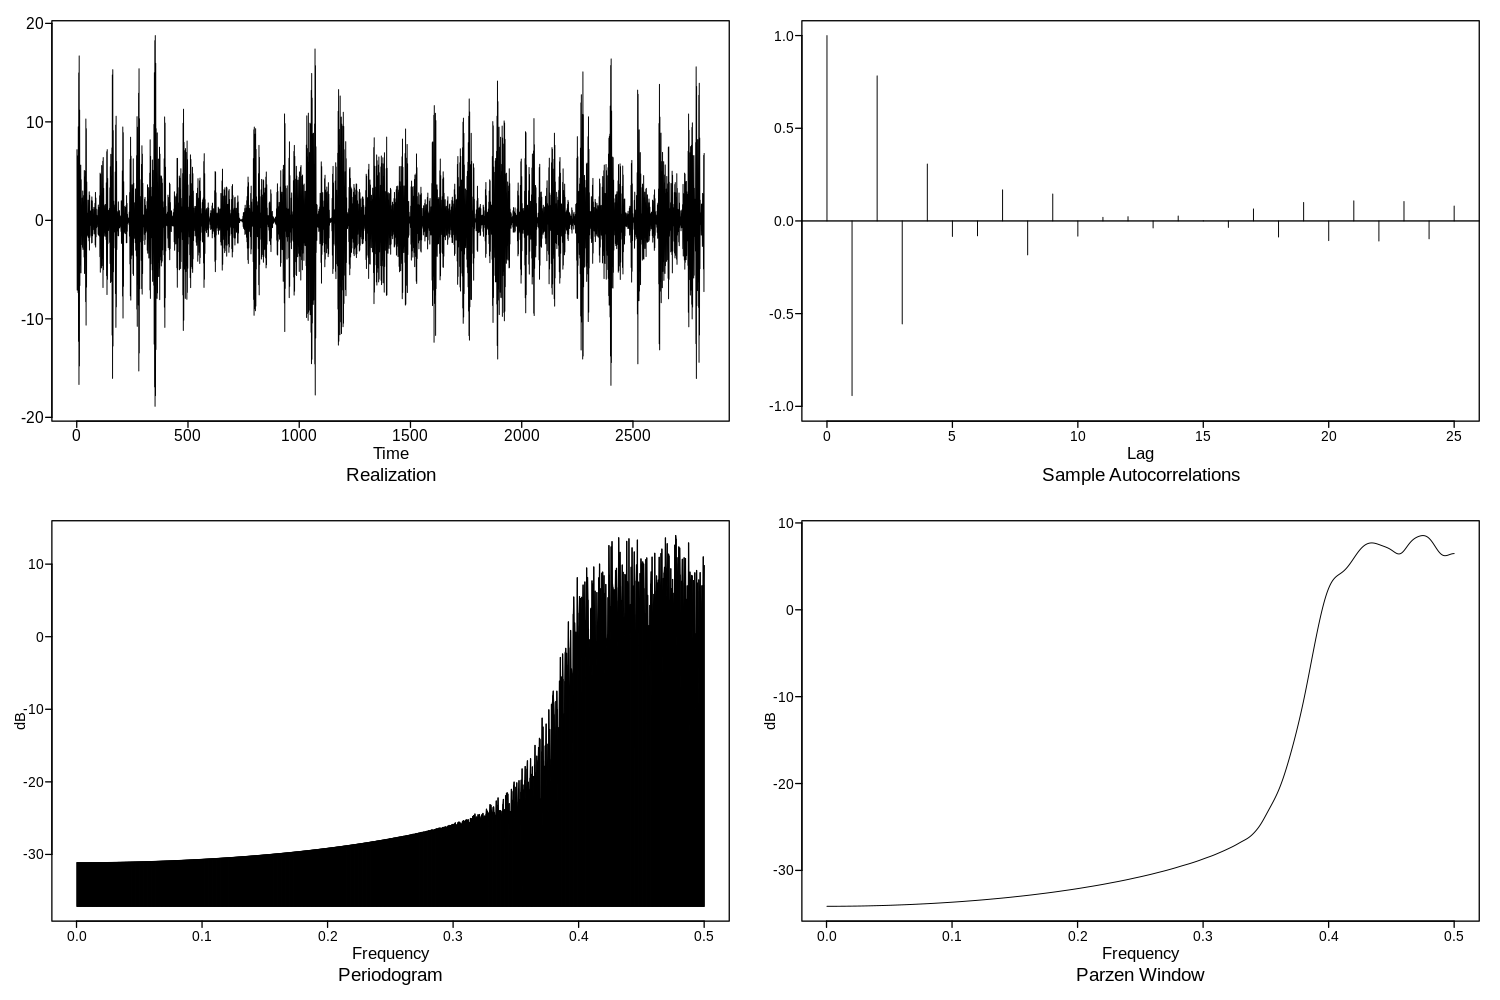

In [99]:
ss.high <- butterworth.wge(ss$Sunspots,order=5,type="high",cutoff=0.4,plot=FALSE)
plotts.sample.wge(ss.high$x.filt)

### Low-Pass Filter

$autplt
 [1] 1.0000000 0.9958108 0.9842128 0.9669327 0.9463166 0.9247498 0.9041034
 [8] 0.8853579 0.8684911 0.8526355 0.8364309 0.8184549 0.7976068 0.7733508
[15] 0.7457772 0.7154961 0.6834195 0.6505055 0.6175377 0.5849875 0.5529787
[22] 0.5213456 0.4897530 0.4578364 0.4253231 0.3921058

$freq
   [1] 0.0003546099 0.0007092199 0.0010638298 0.0014184397 0.0017730496
   [6] 0.0021276596 0.0024822695 0.0028368794 0.0031914894 0.0035460993
  [11] 0.0039007092 0.0042553191 0.0046099291 0.0049645390 0.0053191489
  [16] 0.0056737589 0.0060283688 0.0063829787 0.0067375887 0.0070921986
  [21] 0.0074468085 0.0078014184 0.0081560284 0.0085106383 0.0088652482
  [26] 0.0092198582 0.0095744681 0.0099290780 0.0102836879 0.0106382979
  [31] 0.0109929078 0.0113475177 0.0117021277 0.0120567376 0.0124113475
  [36] 0.0127659574 0.0131205674 0.0134751773 0.0138297872 0.0141843972
  [41] 0.0145390071 0.0148936170 0.0152482270 0.0156028369 0.0159574468
  [46] 0.0163120567 0.0166666667 0.0170212766 0.0173758865 0.0177304965
  [51] 0.0180851064 0.0184397163 0.0187943262 0.0191489362 0.0195035461
  [56] 0.0198581560 0.0202127660 0.0205673759 0.0209219858 0.0212765957
  [61] 0.0216312057 0.0219858156 0.0223404255 0.0226950355 0.0230496454
  [66] 0.0234042553 0.0237588652 0.0241134752 0.0244680851 0.0248226950
  [71] 0.0251773050 0.0255319149 0.0258865248 0.0262411348 0.0265957447
  [76] 0.0269503546 0.0273049645 0.0276595745 0.0280141844 0.0283687943
  [81] 0.0287234043 0.0290780142 0.0294326241 0.0297872340 0.0301418440
  [86] 0.0304964539 0.0308510638 0.0312056738 0.0315602837 0.0319148936
  [91] 0.0322695035 0.0326241135 0.0329787234 0.0333333333 0.0336879433
  [96] 0.0340425532 0.0343971631 0.0347517730 0.0351063830 0.0354609929
 [101] 0.0358156028 0.0361702128 0.0365248227 0.0368794326 0.0372340426
 [106] 0.0375886525 0.0379432624 0.0382978723 0.0386524823 0.0390070922
 [111] 0.0393617021 0.0397163121 0.0400709220 0.0404255319 0.0407801418
 [116] 0.0411347518 0.0414893617 0.0418439716 0.0421985816 0.0425531915
 [121] 0.0429078014 0.0432624113 0.0436170213 0.0439716312 0.0443262411
 [126] 0.0446808511 0.0450354610 0.0453900709 0.0457446809 0.0460992908
 [131] 0.0464539007 0.0468085106 0.0471631206 0.0475177305 0.0478723404
 [136] 0.0482269504 0.0485815603 0.0489361702 0.0492907801 0.0496453901
 [141] 0.0500000000 0.0503546099 0.0507092199 0.0510638298 0.0514184397
 [146] 0.0517730496 0.0521276596 0.0524822695 0.0528368794 0.0531914894
 [151] 0.0535460993 0.0539007092 0.0542553191 0.0546099291 0.0549645390
 [156] 0.0553191489 0.0556737589 0.0560283688 0.0563829787 0.0567375887
 [161] 0.0570921986 0.0574468085 0.0578014184 0.0581560284 0.0585106383
 [166] 0.0588652482 0.0592198582 0.0595744681 0.0599290780 0.0602836879
 [171] 0.0606382979 0.0609929078 0.0613475177 0.0617021277 0.0620567376
 [176] 0.0624113475 0.0627659574 0.0631205674 0.0634751773 0.0638297872
 [181] 0.0641843972 0.0645390071 0.0648936170 0.0652482270 0.0656028369
 [186] 0.0659574468 0.0663120567 0.0666666667 0.0670212766 0.0673758865
 [191] 0.0677304965 0.0680851064 0.0684397163 0.0687943262 0.0691489362
 [196] 0.0695035461 0.0698581560 0.0702127660 0.0705673759 0.0709219858
 [201] 0.0712765957 0.0716312057 0.0719858156 0.0723404255 0.0726950355
 [206] 0.0730496454 0.0734042553 0.0737588652 0.0741134752 0.0744680851
 [211] 0.0748226950 0.0751773050 0.0755319149 0.0758865248 0.0762411348
 [216] 0.0765957447 0.0769503546 0.0773049645 0.0776595745 0.0780141844
 [221] 0.0783687943 0.0787234043 0.0790780142 0.0794326241 0.0797872340
 [226] 0.0801418440 0.0804964539 0.0808510638 0.0812056738 0.0815602837
 [231] 0.0819148936 0.0822695035 0.0826241135 0.0829787234 0.0833333333
 [236] 0.0836879433 0.0840425532 0.0843971631 0.0847517730 0.0851063830
 [241] 0.0854609929 0.0858156028 0.0861702128 0.0865248227 0.0868794326
 [246] 0.0872340426 0.0875886525 0.0879432624 0.0882978723 0.0886524823
 [251] 0.0890070922 0.0893617021 0.0897163121 0.0900709220 0.0904255319
 [256] 0.0907801418 0.0911347518 

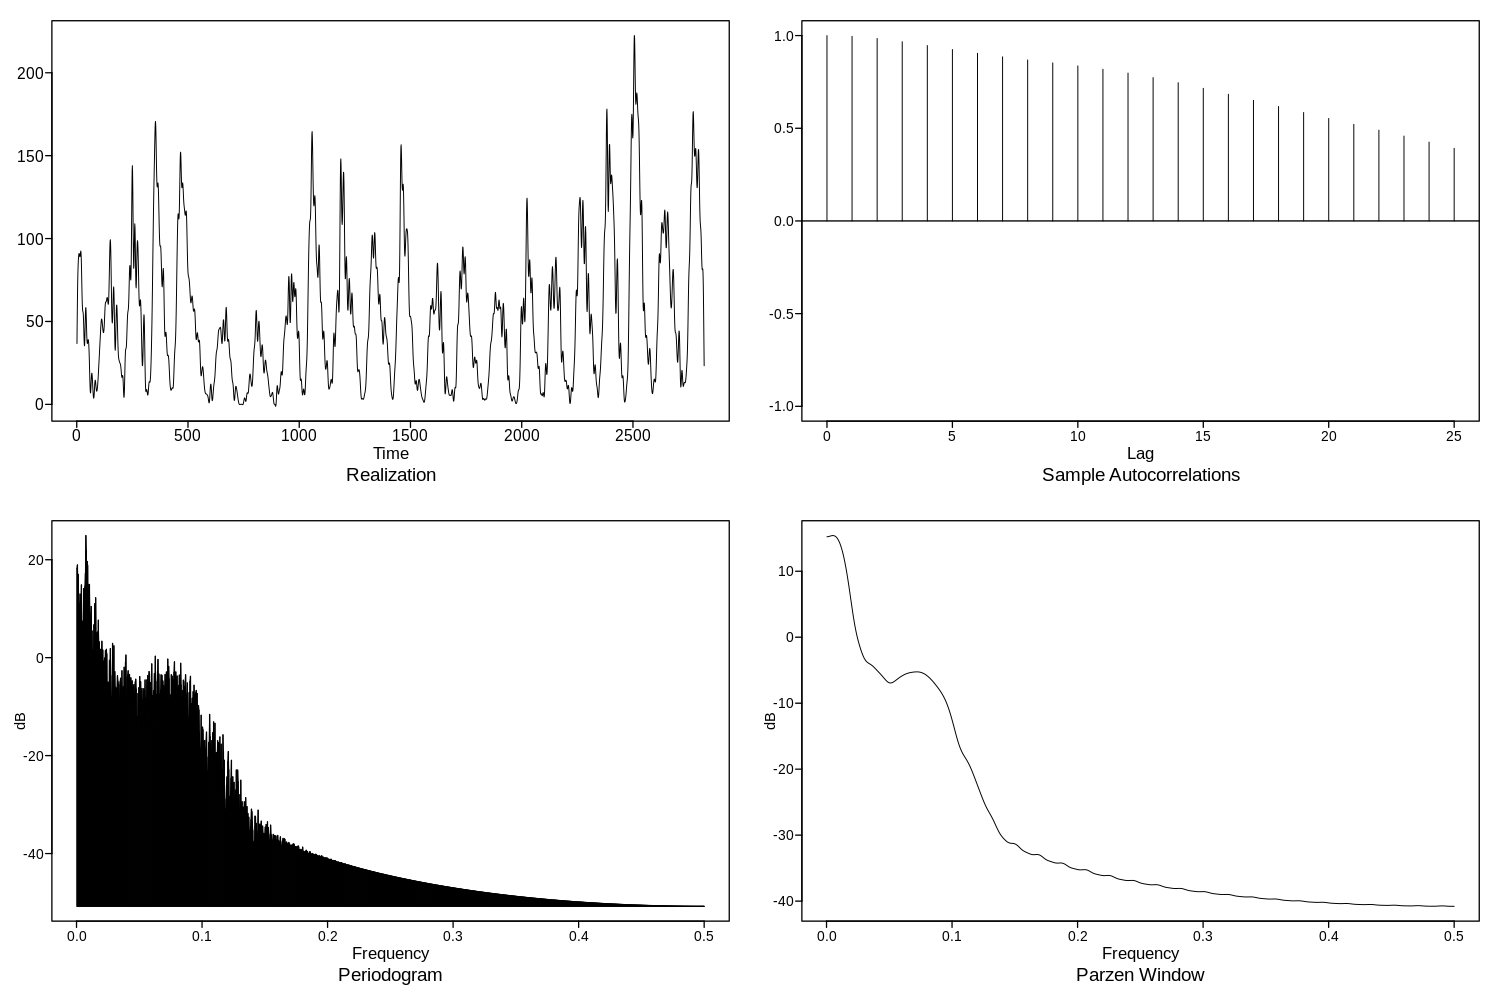

In [100]:
ss.low <- butterworth.wge(ss$Sunspots,order=5,type="low",cutoff=0.1,plot=FALSE)
plotts.sample.wge(ss.low$x.filt)

## Discussion and Conclusion

The original data appears somewhat cyclical, as it has identifiable and fairly predictable peaks and troughs. There is, however, no clear rhyme or reason to which months and years have more or fewer sunspots and the periodigram is pretty constant after an initial spike, making it seem as though the data is not especially cyclical.

Looking at the periodigrams of each filter, there seem to be many more extremely high samples than extremely low, which is plain to see in the plot of the original data. Despite being able to see this trend from the outset, I was still hoping for something more exciting than I ended up with for the low-pass filter. I was intrigued by what seems to be a hump in the low-pass filter's periodigram and Parzen window, however. I am not sure what causes this phenomenon, and it is not present in the high-pass filter. Other than this, the other key difference between the effects of the two filters on the data is the autocorrelations. The autocorrelations for the high-pass filter fluctuate between positive and negative, while they remain strongly positive for the low-pass filter. I think this is because of the fact that the peaks in the data are all different heights and there is no set pattern to them, whereas the low points are all pretty much the same.

## References

Andrews D.F., Herzberg A.M. (1985) Monthly Mean Sunspot Numbers. In: Data. Springer Series in Statistics. Springer, New York, NY. https://doi.org/10.1007/978-1-4612-5098-2_12

Brownlee, J. (2016, November 30). *7 Time Series Datasets for Machine Learning*. Machine Learning Mastery. https://machinelearningmastery.com/time-series-datasets-for-machine-learning/